# Machine Learning November Major Project

###                                                                                                   Done By Suprith Shettigar

### Creating a Classification model to predict the setiment either    (1 or 0) based on Amazon Alexa reviews. 

#### importing all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
import re
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import time

import warnings
warnings.filterwarnings("ignore")

#### downloading important requirements:

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('word.net')
nltk.download('omw-1.4')
nltk.download('averaged_percentron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading word.net: Package 'word.net' not found in
[nltk_data]     index
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Error loading averaged_percentron_tagger: Package
[nltk_data]     'averaged_percentron_tagger' not found in index
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\91984\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already 

True

#### Reading the dataset:

In [3]:
df = pd.read_excel('amazon_alexa.xlsx')

In [4]:
df.head()

,reviews,sentiment
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [5]:
df.tail()

,reviews,sentiment
3145,"Perfect for kids, adults and everyone in betwe...",1
3146,"Listening to music, searching locations, check...",1
3147,"I do love these things, i have them running my...",1
3148,Only complaint I have is that the sound qualit...,1
3149,Good,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reviews    3071 non-null   object
 1   sentiment  3150 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.3+ KB


In [7]:
df.shape

(3150, 2)

In [8]:
df['sentiment'].value_counts()

1    2893
0     257
Name: sentiment, dtype: int64

#### Handling all the Null values: 

In [9]:
df.isnull().sum()

reviews      79
sentiment     0
dtype: int64

In [10]:
df['reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: reviews, Length: 3150, dtype: object

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

reviews      0
sentiment    0
dtype: int64

#### Handling the duplicate values:

In [12]:
df.duplicated().sum()

771

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Preprocess the reviews based on the following parameters:

In [14]:
data1 = df.copy()

### a) Tokenizing words

In [15]:
tok = []
for i in df['reviews']:
    t = i.lower()                   # b) conversion to lower case
    t = re.sub('[^A-Za-z]',' ',t)# c) Removing Punctuations
    t = word_tokenize(t)            # a) Tokenizing words 
    tok.append(t)
print(tok)

[['love', 'my', 'echo'], ['loved', 'it'], ['sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', 'i', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home'], ['i', 'have', 'had', 'a', 'lot', 'of', 'fun', 'with', 'this', 'thing', 'my', 'yr', 'old', 'learns', 'about', 'dinosaurs', 'i', 'control', 'the', 'lights', 'and', 'play', 'games', 'like', 'categories', 'has', 'nice', 'sound', 'when', 'playing', 'music', 'as', 'well'], ['music'], ['i', 'received', 'the', 'echo', 'as', 'a', 'gift', 'i', 'needed', 'another', 'bluetooth', 'or', 'something', 'to', 'play', 'music', 'easily', 'accessible', 'and', 'found', 'this', 'smart', 'speaker', 'can', 't', 'wait', 'to', 'see', 'what', 'else', 'it', 'can', 'do'], ['without', 'having', 'a', 'cellphone', 'i', 'can', 'not', 'use', 'many', 'of', 'her', 'features', 'i

In [16]:
# all the punctuation stored
pun = []
for i in df['reviews']:
    p = re.sub('[A-Za-z0-9]',' ',i) # collecting the punctuations
    p = word_tokenize(p)
    pun.append(p)
print(pun)

[['!'], ['!'], [',', '.', '.'], ['.', ',', '.', '.'], [], ['.', ',', '.', '’', '.'], [',', '.', '.', '.', ',', ',', '.', '.', '.'], ["'", '.', "'", '.', '.'], [], ['!', '’', '’', '!', ',', ',', '!', '’', '!'], [',', '.'], ['!', '!', "'", '.'], [',', '.', '...', ',', ',', '!'], [',', ',', '!', '!'], ['....'], [',', '.'], ['.', '.'], ['.', '!', '.'], ['.'], ['.', '/', '.', ',', "'", '/', '.', '.', ':', ')', ',', '/', '.', ',', ',', ',', '/', '/', '.', "'", '?', ':', ')'], ['.', '.', '.'], ['!', ',', ',', ',', '.', '.', '.', '.', "'", "'", '.', "'", "'", "'", '.'], ['.', '.', '.', ',', '’', '.'], ['.'], [',', '.', ',', '.'], [], ['.', "'", ',', '.', '.', "'", '.'], ['!', '!', '!'], ['.', ',', '.'], [], ['...'], [], ['.', ',', '.', '“', '”', '’', '.', '“', '”', '.', '.'], ['.', '.', "'", "'", '.', '.'], ['!'], ['.', '.'], ['.', '.', '’', ',', '-', '.'], [], ['!', '.', ',', '.'], ["'", '.', '.', '(', "'", ',', ')', '.', "'", '!', '.', '$', '.', ',', '!'], ['.', "'"], ['.', ',', '.', '+', '.

### b) conversion to lower case

In [17]:
low = []
for i in df['reviews']:
    t = i.lower()      # b) conversion to lower case
    low.append(t)
print(low)

['love my echo!', 'loved it!', 'sometimes while playing a game, you can answer a question correctly but alexa says you got it wrong and answers the same as you.  i like being able to turn lights on and off while away from home.', 'i have had a lot of fun with this thing. my 4 yr old learns about dinosaurs, i control the lights and play games like categories. has nice sound when playing music as well.', 'music', 'i received the echo as a gift. i needed another bluetooth or something to play music easily accessible, and found this smart speaker. can’t wait to see what else it can do.', 'without having a cellphone, i cannot use many of her features. i have an ipad but do not see that of any use.  it is a great alarm.  if u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.it is fun to ask random questions to hear her response.  she does not seem to be very smartbon politics yet.', "i think this is the 5th one i've purcha

### c) Removing Punctuations

In [18]:
rep = []
for i in df['reviews']:
    t = i.lower()                   # b) conversion to lower case
    t = re.sub('[^A-Za-z]',' ',t)# c) Removing Punctuations
    rep.append(t)
print(rep)

['love my echo ', 'loved it ', 'sometimes while playing a game  you can answer a question correctly but alexa says you got it wrong and answers the same as you   i like being able to turn lights on and off while away from home ', 'i have had a lot of fun with this thing  my   yr old learns about dinosaurs  i control the lights and play games like categories  has nice sound when playing music as well ', 'music', 'i received the echo as a gift  i needed another bluetooth or something to play music easily accessible  and found this smart speaker  can t wait to see what else it can do ', 'without having a cellphone  i cannot use many of her features  i have an ipad but do not see that of any use   it is a great alarm   if u r almost deaf  you can hear her alarm in the bedroom from out in the living room  so that is reason enough to keep her it is fun to ask random questions to hear her response   she does not seem to be very smartbon politics yet ', 'i think this is the  th one i ve purcha

### d) Removing Stop words

In [19]:
sw = stopwords.words('English') 

In [20]:
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
stopw = []
for i in df['reviews']:
    t = i.lower()                     # b) conversion to lower case
    t = re.sub('[^A-Za-z]',' ',t)  # c) Removing Punctuations
    t = word_tokenize(t)              # a) Tokenizing words 
    t = [i for i in t if i not in sw] # d) Removing Stop words
    stopw.append(t)
print(stopw)

[['love', 'echo'], ['loved'], ['sometimes', 'playing', 'game', 'answer', 'question', 'correctly', 'alexa', 'says', 'got', 'wrong', 'answers', 'like', 'able', 'turn', 'lights', 'away', 'home'], ['lot', 'fun', 'thing', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well'], ['music'], ['received', 'echo', 'gift', 'needed', 'another', 'bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'wait', 'see', 'else'], ['without', 'cellphone', 'use', 'many', 'features', 'ipad', 'see', 'use', 'great', 'alarm', 'u', 'r', 'almost', 'deaf', 'hear', 'alarm', 'bedroom', 'living', 'room', 'reason', 'enough', 'keep', 'fun', 'ask', 'random', 'questions', 'hear', 'response', 'seem', 'smartbon', 'politics', 'yet'], ['think', 'th', 'one', 'purchased', 'working', 'getting', 'one', 'every', 'room', 'house', 'really', 'like', 'features', 'offer', 'specifily', 'playing', 'music', 'echos

### e) Stemming or lemmatizing with words 

In [22]:
ps = PorterStemmer()
ls = LancasterStemmer()

In [23]:
for i in data1['reviews']:
    t = i.lower();
    t = re.sub('[^A-Za-z0]',' ',t) 
    t = word_tokenize(t)
    t = [i for i in t if i not in sw]
    t = i.lower()
    stem_res = [ps.stem(t) for i in t]


print("Stemming:")  
print(stem_res)

Stemming:
['the echo dot was easy to set up and use. it helps provide music, etc. to small spaces and was just what i was looking for.', 'the echo dot was easy to set up and use. it helps provide music, etc. to small spaces and was just what i was looking for.', 'the echo dot was easy to set up and use. it helps provide music, etc. to small spaces and was just what i was looking for.', 'the echo dot was easy to set up and use. it helps provide music, etc. to small spaces and was just what i was looking for.', 'the echo dot was easy to set up and use. it helps provide music, etc. to small spaces and was just what i was looking for.', 'the echo dot was easy to set up and use. it helps provide music, etc. to small spaces and was just what i was looking for.', 'the echo dot was easy to set up and use. it helps provide music, etc. to small spaces and was just what i was looking for.', 'the echo dot was easy to set up and use. it helps provide music, etc. to small spaces and was just what i 

In [24]:
lm = WordNetLemmatizer()

for i in data1['reviews']:
    t = i.lower()
    t = re.sub('[^A-Za-z0]',' ',t) 
    t = word_tokenize(t)
    t = [i for i in t if i not in sw]  
    lm_res = [lm.lemmatize(i) for i in t]
    
print(lm_res)

['echo', 'dot', 'easy', 'set', 'use', 'help', 'provide', 'music', 'etc', 'small', 'space', 'looking']


## All In One Program:

In [25]:
data = []
for i in df['reviews']:
    t = i.lower()                     # b) conversion to lower case
    t = re.sub('[^A-Za-z]',' ',t)  # c) Removing Punctuations
    t = word_tokenize(t)              # a) Tokenizing words 
    t = [i for i in t if i not in sw] # d) Removing Stop words
    t = [lm.lemmatize(i) for i in t]   # e) lemmatization
    t = " ".join(t) 
    data.append(t)
print(data)

['love echo', 'loved', 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home', 'lot fun thing yr old learns dinosaur control light play game like category nice sound playing music well', 'music', 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else', 'without cellphone use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet', 'think th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house', 'look great', 'love listened song heard since childhood get news weather information great', 'sent year old dad talk constantly', 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time', 'purchased mother knee problem give something 

### Select x and y: 

In [26]:
df.columns

Index(['reviews', 'sentiment'], dtype='object')

In [27]:
x = data
y = df['sentiment']
print(type(x))
print(type(y))

<class 'list'>
<class 'pandas.core.series.Series'>


## Transform the words into vectors using:

### a) Count Vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
print(data)

['love echo', 'loved', 'sometimes playing game answer question correctly alexa say got wrong answer like able turn light away home', 'lot fun thing yr old learns dinosaur control light play game like category nice sound playing music well', 'music', 'received echo gift needed another bluetooth something play music easily accessible found smart speaker wait see else', 'without cellphone use many feature ipad see use great alarm u r almost deaf hear alarm bedroom living room reason enough keep fun ask random question hear response seem smartbon politics yet', 'think th one purchased working getting one every room house really like feature offer specifily playing music echo controlling light throughout house', 'look great', 'love listened song heard since childhood get news weather information great', 'sent year old dad talk constantly', 'love learning knew thing eveyday still figuring everything work far easy use understand make laugh time', 'purchased mother knee problem give something 

In [29]:
cv = CountVectorizer(max_features=1500)
sm = cv.fit_transform(data).toarray()
print(len(cv.get_feature_names_out())) # unique words

1500


In [30]:
print(cv.get_feature_names_out()[:50])

['ability' 'able' 'absolutely' 'accent' 'access' 'account' 'across' 'act'
 'activated' 'actually' 'ad' 'adapter' 'add' 'added' 'addict' 'addicted'
 'adding' 'addition' 'additional' 'adequate' 'adjust' 'advanced'
 'advantage' 'advertise' 'advertised' 'advertisement' 'advertising'
 'advise' 'ago' 'ai' 'alarm' 'alert' 'alex' 'alexa' 'alexia' 'allow'
 'allows' 'almost' 'alone' 'along' 'already' 'also' 'alternative'
 'although' 'always' 'amazed' 'amazing' 'amazingly' 'amazon' 'american']


In [31]:
print(len(sm))

2300


In [32]:
df.shape

(2300, 2)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(sm,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1610, 1500)
(690, 1500)
(1610,)
(690,)


## confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
def eval_model(y_test,ypred):
    cm=confusion_matrix(y_test,ypred)
    print("confusion matrix:")
    print(cm)
    print("\n\n")
    print("classification report:")
    print(classification_report(y_test,ypred))

def mscore(model):
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))

## Applying the following ML models on the training dataset and generate the predicted value for the test dataset.

### a) Multinomial Naive Bayes Classifiction:

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
m1 = MultinomialNB()
m1.fit(x_train,y_train)

MultinomialNB()

In [58]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 

In [59]:
mscore(m1)

Training score 0.9559006211180124
Testing score 0.9420289855072463


### b) Logistic Regression:

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
m2 = LogisticRegression()
m2.fit(x_train,y_train)

LogisticRegression()

In [62]:
mscore(m2)

Training score 0.970807453416149
Testing score 0.9420289855072463


In [63]:
ypred_m2=m2.predict(x_test)

### c) KNN Classification: 

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
m3 = KNeighborsClassifier()
m3.fit(x_train,y_train)

KNeighborsClassifier()

In [66]:
mscore(m3)

Training score 0.9074534161490683
Testing score 0.9231884057971015


In [67]:
ypred_m3 = m3.predict(x_test)

## 7) Predict the feedback test for test data

### a) Multinomial Naive Bayes Classifiction test score is:

In [68]:
m1.score(x_test,y_test)

0.9420289855072463

### a)  Logistic Regression test score is:

In [69]:
m2.score(x_test,y_test)

0.9420289855072463

### c) KNN Classifiction test score is:

In [70]:
m3.score(x_test,y_test)

0.9231884057971015

## 8) computing the confusion matrix and classification report for eash of these models

### Multinomial Naive Bayes Classifiction:

In [71]:
eval_model(y_test,ypred_m1)

confusion matrix:
[[ 31  22]
 [ 18 619]]



classification report:
              precision    recall  f1-score   support

           0       0.63      0.58      0.61        53
           1       0.97      0.97      0.97       637

    accuracy                           0.94       690
   macro avg       0.80      0.78      0.79       690
weighted avg       0.94      0.94      0.94       690



Text(50.722222222222214, 0.5, 'Actual')

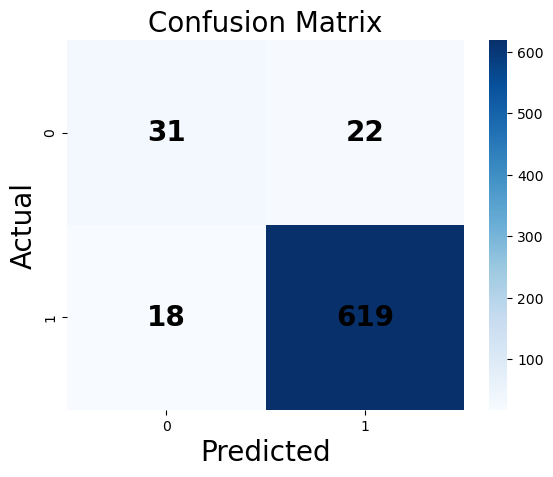

In [77]:
cm=confusion_matrix(y_test,ypred_m1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',annot_kws={"size": 20,'weight':'bold','color':'black'})
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)


### Logistic Regression:

In [72]:
eval_model(y_test,ypred_m2)

confusion matrix:
[[ 21  32]
 [  8 629]]



classification report:
              precision    recall  f1-score   support

           0       0.72      0.40      0.51        53
           1       0.95      0.99      0.97       637

    accuracy                           0.94       690
   macro avg       0.84      0.69      0.74       690
weighted avg       0.93      0.94      0.93       690



Text(50.722222222222214, 0.5, 'Actual')

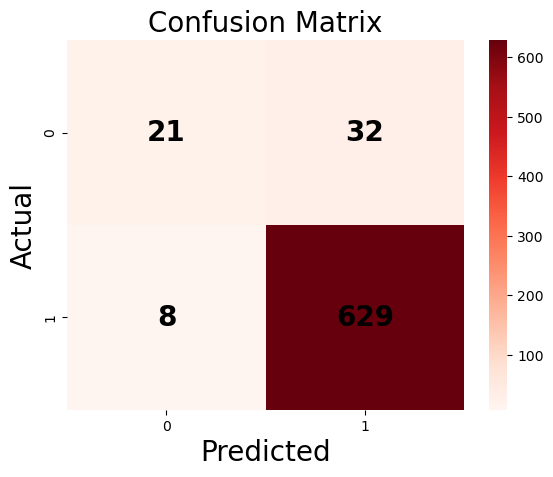

In [75]:
cm=confusion_matrix(y_test,ypred_m2)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='d',annot_kws={"size": 20,'weight':'bold','color':'black'})
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)


### KNN Classification:

In [73]:
eval_model(y_test,ypred_m3)

confusion matrix:
[[  1  52]
 [  1 636]]



classification report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        53
           1       0.92      1.00      0.96       637

    accuracy                           0.92       690
   macro avg       0.71      0.51      0.50       690
weighted avg       0.89      0.92      0.89       690



Text(50.722222222222214, 0.5, 'Actual')

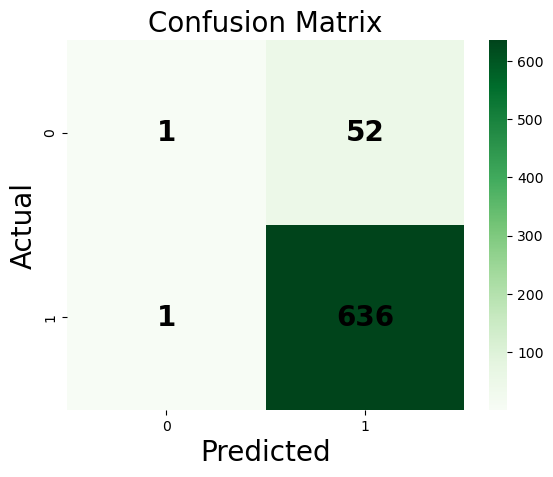

In [78]:
cm=confusion_matrix(y_test,ypred_m3)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d',annot_kws={"size": 20,'weight':'bold','color':'black'})
plt.title("Confusion Matrix", fontsize=20)
plt.xlabel("Predicted", fontsize=20)
plt.ylabel("Actual", fontsize=20)

### 9) Report the model with the best accuracy

#### both Logistic Regression and Multinomial Naive Bayes Classifiction show the best result during the testing

#### but Logistic Regression is slightly overfitted model compared to the Multinomial Naive Bayes Classifiction.

In [79]:
print("Multinomial Naive Bayes Classifiction training and test score:")
print(mscore(m1))
print("\n\n")
print("Logistic Regression training and test score:")
print(mscore(m2))
print("\n\n")
print("KNN Classifiction training and test score:")
print(mscore(m3))

Multinomial Naive Bayes Classifiction training and test score:
Training score 0.9559006211180124
Testing score 0.9420289855072463
None



Logistic Regression training and test score:
Training score 0.970807453416149
Testing score 0.9420289855072463
None



KNN Classifiction training and test score:
Training score 0.9074534161490683
Testing score 0.9231884057971015
None


### Therefore the order of the testing is scores is
### 1) Multinomial Naive Bayes Classifiction 
### 2) Logistic Regression 
### 3) KNN Classifiction